## Importing Libraries

In [1]:
## importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
df = pd.read_csv("ratings_Electronics (1).csv")
df.head()


,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [3]:
df.columns = ['user_id', 'prod_id', 'rating', 'timestamp'] 
df.head()


,user_id,prod_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
df.drop(['timestamp'], axis=1, inplace=True)
df.head()


,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [5]:
df_copy = df.copy(deep=True)
df_copy.head()


,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


## EDA

In [6]:
df.shape





(7824481, 3)

In [7]:
df.isnull().sum()



user_id    0
prod_id    0
rating     0
dtype: int64

In [8]:
df.describe()

,rating
count,7.824481e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


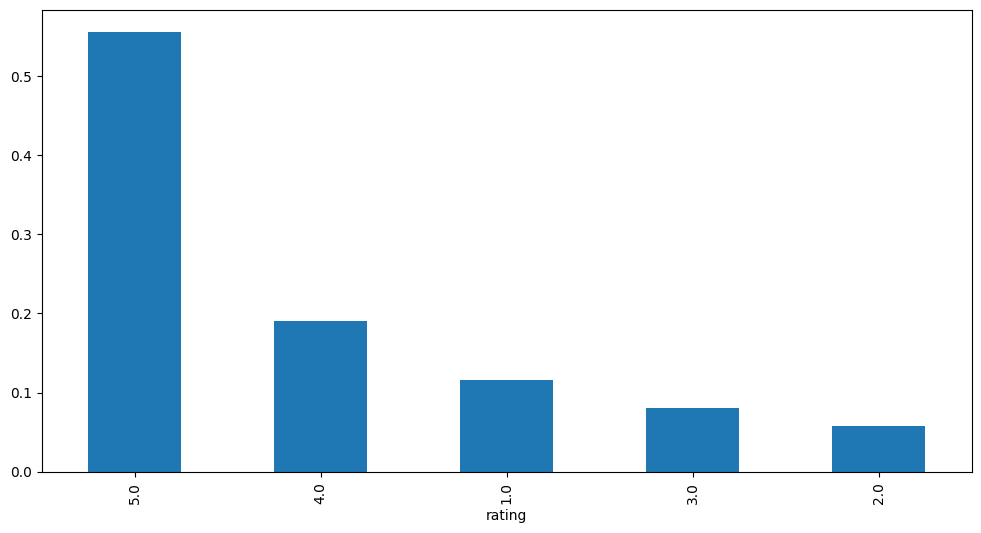

In [9]:
plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

In [10]:
## No of Unique Users and Products in the Dataset
print(df['user_id'].nunique())
print(df['prod_id'].nunique())




4201696
476001


In [11]:
## User's with most no of ratings 
most_rated = df.groupby('user_id')['rating'].count().sort_values(ascending=False).head(10)
most_rated


user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
Name: rating, dtype: int64

## Preprocessing

In [12]:
## No of people who rated a product more than 20 ratings
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index)]
df_final.shape




(125871, 3)

In [13]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['prod_id'].nunique())

The number of observations in the final data = 125871
Number of unique USERS in the final data =  1540
Number of unique PRODUCTS in the final data =  48190


In [14]:
## Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0

final_ratings_matrix = df_final.pivot(index = 'user_id', columns ='prod_id', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (1540, 48190)


In [15]:
#Finding the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Rank Based Recommendation System


In [16]:
average_rating = df_final.groupby('prod_id')['rating'].mean()

count_rating = df_final.groupby('prod_id')['rating'].count()

final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})
final_rating.sort_values('avg_rating', ascending=False).head(10)

final_rating.head()




,avg_rating,rating_count
prod_id,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [17]:

#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):
    
    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values('avg_rating',ascending=False)
    
    return recommendations.index[:n]





### Recommendation for the top 10 products based on the average rating and 0 interactions

In [18]:
print(top_n_products(final_rating, 10, 0))


Index(['1400699169', 'B00LKG1MC8', '0594451647', '1685560148', 'B00LGQ6HL8',
       '3744295508', 'B00LGN7Y3G', '1400501520', '787988002X', 'B00L8I6SFY'],
      dtype='object', name='prod_id')


### Recommendation for the top 5 products based on the average rating and 1 interactions


In [19]:
print(top_n_products(final_rating, 5, 1))


Index(['B00LGQ6HL8', 'B00L8I6SFY', 'B00L3YHF6O', 'B00KNEBRT6', 'B00KH8QNOC'], dtype='object', name='prod_id')


## Collaborative Filtering Based Recommendation System


### User based Collaborative Filtering


In [20]:
## change user_id wiht user_index in the final_ratings_matrix
final_ratings_matrix['user_index'] = np.arange(0,final_ratings_matrix.shape[0])
final_ratings_matrix.set_index('user_index', inplace=True)
final_ratings_matrix.head()




prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Function to find Similarity Users with  Similarity scores


In [21]:
from sklearn.metrics.pairwise import cosine_similarity


def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows
        
        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        
        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list
   
    #Remove the original user and its similarity score and keep only other similar users 
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score








In [22]:
### Finiding top 5 similar users for user with user_index 1

print(similar_users(2, final_ratings_matrix)[0][0:5])


[86, 1264, 1398, 629, 738]


In [23]:
print(similar_users(2, final_ratings_matrix)[1][0:5])

[array([[0.1460157]]), array([[0.14322781]]), array([[0.12535473]]), array([[0.12094821]]), array([[0.11706789]])]


## Function to Recommend Products


In [24]:
def recommendations(user_index, num_of_products, interactions_matrix):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    
    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []
    
    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            
            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    return recommendations[:num_of_products]
     

In [25]:
recommendations(11,5,final_ratings_matrix)

['B0009S5HQA', 'B004QK7HI8', 'B000YA4PPW', 'B00HPM1G8Q', 'B001AYW91I']

## Model Based Collabrative Filtering

### CSR Matrix

In [26]:
from scipy.sparse import csr_matrix
final_rating_sparse = csr_matrix(final_ratings_matrix.values)


### SVD

In [28]:
from scipy.sparse.linalg import svds
## Singular value Decomposition
U, s, Vt = svds(final_rating_sparse, k =50)

## construct diagonal array in svd
sigma = np.diag(s)

In [30]:
U.shape

(1540, 50)

In [31]:
Vt.shape

(50, 48190)

In [33]:
sigma.shape


(50, 50)

## Predicted Rating

In [35]:
predicted_ratings = np.dot(np.dot(U,sigma),Vt)

## Predicted ratings

preds_df = pd.DataFrame(abs(predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)
     

## Function to Recommed Products

In [36]:
def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):
    
    # Get the user's ratings from the actual and predicted interaction matrices
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})
    temp['Recommended Products'] = np.arange(len(user_ratings))
    temp = temp.set_index('Recommended Products')
    
    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.user_ratings == 0]   
    
    #Recommending products with top predicted ratings
    temp = temp.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

### Recommeding top  5 products with user_id 121

In [37]:

recommend_items(121,final_rating_sparse,preds_matrix,5)


Below are the recommended products for user(user_id = 121):

Recommended Products
28761    2.414390
39003    1.521306
41420    1.309224
40158    1.200111
33819    1.126866
Name: user_predictions, dtype: float64


In [39]:

recommend_items(100,final_rating_sparse,preds_matrix,10)


Below are the recommended products for user(user_id = 100):

Recommended Products
11078    1.624746
16159    1.132730
10276    1.047888
22210    0.955049
18887    0.879705
41618    0.854430
45008    0.816153
43419    0.803755
28761    0.748799
14791    0.748797
Name: user_predictions, dtype: float64


## Evaluating the Model

In [40]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
average_rating = final_ratings_matrix.mean()
average_rating.head()

prod_id
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [42]:
preds_df.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,0.061477,0.001214,0.123433,0.028490,0.016109,0.002855,0.174568,0.011367,0.012997
1,0.002286,0.010898,0.000724,0.130259,0.007506,0.003350,0.063711,0.000674,0.016111,0.002433,...,0.000038,0.013766,0.001473,0.025588,0.042103,0.004251,0.002177,0.024362,0.014765,0.038570
2,0.001655,0.002675,0.007355,0.007264,0.005152,0.003986,0.003480,0.006961,0.006606,0.002719,...,0.001708,0.051040,0.000325,0.054867,0.017870,0.004996,0.002426,0.083928,0.112205,0.005964
3,0.001856,0.011019,0.005910,0.014134,0.000179,0.001877,0.005391,0.001709,0.004968,0.001402,...,0.000582,0.009326,0.000465,0.048315,0.023302,0.006790,0.003380,0.005460,0.015263,0.025996
4,0.001115,0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,0.019347,0.012749,0.001026,0.001364,0.020580,0.011828,0.012770


In [43]:
avg_preds=preds_df.mean()
avg_preds.head()

prod_id
0594451647    0.003360
0594481813    0.005729
0970407998    0.008566
0972683275    0.035330
1400501466    0.006966
dtype: float64

In [44]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings
prod_id,,
0594451647,0.003247,0.003360
0594481813,0.001948,0.005729
0970407998,0.003247,0.008566
0972683275,0.012338,0.035330
1400501466,0.012987,0.006966


In [50]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.013679389779858 



d:\coding\conda\envs\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Hybrid Approch

In [60]:
def hybrid_recommendations(user_index, n_recommendations=5, min_interactions=5):
    """
    Combines recommendations from all three approaches:
    1. Rank-based (Popular items)
    2. User-based Collaborative Filtering
    3. Model-based SVD
    """
    # Get recommendations from each model
    # Rank-based recommendations (popular items)
    popular_recs = set(top_n_products(final_rating, n_recommendations, min_interactions))
    
    # User-based CF recommendations
    user_cf_recs = set(recommendations(user_index, n_recommendations, final_ratings_matrix))
    
    # Model-based SVD recommendations
    svd_recs = set()
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)
    user_ratings = final_rating_sparse[user_index,:].toarray().reshape(-1)
    
    # Create DataFrame for SVD predictions
    temp = pd.DataFrame({
        'prod_id': final_ratings_matrix.columns,
        'user_ratings': user_ratings,
        'user_predictions': user_predictions
    })
    
    # Filter unrated items and sort by predictions
    temp = temp[temp.user_ratings == 0].sort_values('user_predictions', ascending=False)
    svd_recs = set(temp['prod_id'].head(n_recommendations))
    
    # Combine recommendations using a weighted approach
    all_recs = []
    
    # Add items that appear in multiple recommendation sets first
    for item in (popular_recs & user_cf_recs & svd_recs):
        all_recs.append(('All Models', item))
    
    for item in ((popular_recs & user_cf_recs) - svd_recs):
        all_recs.append(('Popular + User-CF', item))
        
    for item in ((popular_recs & svd_recs) - user_cf_recs):
        all_recs.append(('Popular + SVD', item))
        
    for item in ((user_cf_recs & svd_recs) - popular_recs):
        all_recs.append(('User-CF + SVD', item))
    
    # Add remaining unique recommendations
    remaining_items = (popular_recs | user_cf_recs | svd_recs) - set(item[1] for item in all_recs)
    for item in remaining_items:
        if item in popular_recs:
            all_recs.append(('Popular', item))
        elif item in user_cf_recs:
            all_recs.append(('User-CF', item))
        elif item in svd_recs:
            all_recs.append(('SVD', item))
            
    return all_recs[:n_recommendations]



In [61]:
# Function to display recommendations in a readable format
def display_hybrid_recommendations(user_index, n_recommendations=5, min_interactions=5):
    recommendations = hybrid_recommendations(user_index, n_recommendations, min_interactions)
    print(f"\nHybrid Recommendations for user {user_index}:")
    print("-" * 50)
    for i, (source, item) in enumerate(recommendations, 1):
        print(f"{i}. Product ID: {item} (Recommended by: {source})")

# Example usage
display_hybrid_recommendations(11, 5, 0)


Hybrid Recommendations for user 11:
--------------------------------------------------
1. Product ID: B0009S5HQA (Recommended by: User-CF)
2. Product ID: B004QK7HI8 (Recommended by: User-CF)
3. Product ID: 1400699169 (Recommended by: Popular)
4. Product ID: B004T9RR6I (Recommended by: SVD)
5. Product ID: B000YA4PPW (Recommended by: User-CF)
